## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.424936 -1.280538 -1.097321  0.465568  0.003214  0.133733
1 -0.340647  0.994917  0.477853  0.540620 -0.482676  0.595073
2 -0.826637 -0.482804  0.507594 -0.160256  1.569505 -0.348680
3  1.021900 -1.452496 -0.445394  0.150503  1.571570 -0.301698
4  0.850870  1.634597  0.222697 -1.270008 -1.207521 -1.090710


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9824090	total: 57.2ms	remaining: 57.2s
1:	learn: 0.9726895	total: 57.8ms	remaining: 28.9s
2:	learn: 0.9627405	total: 58.3ms	remaining: 19.4s
3:	learn: 0.9540185	total: 58.8ms	remaining: 14.6s
4:	learn: 0.9453058	total: 59.4ms	remaining: 11.8s
5:	learn: 0.9375272	total: 59.9ms	remaining: 9.93s
6:	learn: 0.9266714	total: 60.4ms	remaining: 8.57s
7:	learn: 0.9173687	total: 60.8ms	remaining: 7.54s
8:	learn: 0.9084900	total: 61.3ms	remaining: 6.75s
9:	learn: 0.8998346	total: 61.9ms	remaining: 6.13s
10:	learn: 0.8914403	total: 62.4ms	remaining: 5.61s
11:	learn: 0.8818605	total: 62.9ms	remaining: 5.18s
12:	learn: 0.8726922	total: 63.5ms	remaining: 4.82s
13:	learn: 0.8657461	total: 64.2ms	remaining: 4.52s
14:	learn: 0.8581867	total: 64.7ms	remaining: 4.25s
15:	learn: 0.8501740	total: 65.1ms	remaining: 4s
16:	learn: 0.8432242	total: 65.8ms	remaining: 3.8s
17:	learn: 0.8345388	total: 66.3ms	remaining: 3.61s
18:	learn: 0.8267512	total: 66.8ms	remaining: 3.

104:	learn: 0.3962339	total: 109ms	remaining: 926ms
105:	learn: 0.3930204	total: 109ms	remaining: 922ms
106:	learn: 0.3900061	total: 110ms	remaining: 915ms
107:	learn: 0.3874787	total: 110ms	remaining: 910ms
108:	learn: 0.3847494	total: 111ms	remaining: 906ms
109:	learn: 0.3819572	total: 111ms	remaining: 900ms
110:	learn: 0.3792464	total: 112ms	remaining: 894ms
111:	learn: 0.3767774	total: 112ms	remaining: 889ms
112:	learn: 0.3739675	total: 113ms	remaining: 884ms
113:	learn: 0.3707753	total: 113ms	remaining: 879ms
114:	learn: 0.3683140	total: 114ms	remaining: 875ms
115:	learn: 0.3655276	total: 114ms	remaining: 870ms
116:	learn: 0.3628158	total: 115ms	remaining: 865ms
117:	learn: 0.3596154	total: 115ms	remaining: 860ms
118:	learn: 0.3569449	total: 115ms	remaining: 854ms
119:	learn: 0.3540474	total: 116ms	remaining: 850ms
120:	learn: 0.3516426	total: 117ms	remaining: 847ms
121:	learn: 0.3486744	total: 117ms	remaining: 842ms
122:	learn: 0.3462919	total: 118ms	remaining: 838ms
123:	learn: 

205:	learn: 0.1968769	total: 156ms	remaining: 602ms
206:	learn: 0.1958757	total: 157ms	remaining: 601ms
207:	learn: 0.1949368	total: 157ms	remaining: 599ms
208:	learn: 0.1940266	total: 158ms	remaining: 597ms
209:	learn: 0.1926974	total: 158ms	remaining: 595ms
210:	learn: 0.1915841	total: 159ms	remaining: 593ms
211:	learn: 0.1904961	total: 159ms	remaining: 592ms
212:	learn: 0.1893522	total: 160ms	remaining: 589ms
213:	learn: 0.1881845	total: 160ms	remaining: 588ms
214:	learn: 0.1871195	total: 160ms	remaining: 586ms
215:	learn: 0.1854703	total: 161ms	remaining: 585ms
216:	learn: 0.1844435	total: 162ms	remaining: 583ms
217:	learn: 0.1834348	total: 162ms	remaining: 581ms
218:	learn: 0.1822978	total: 162ms	remaining: 579ms
219:	learn: 0.1813503	total: 163ms	remaining: 577ms
220:	learn: 0.1802655	total: 163ms	remaining: 575ms
221:	learn: 0.1793340	total: 164ms	remaining: 574ms
222:	learn: 0.1779233	total: 164ms	remaining: 572ms
223:	learn: 0.1764667	total: 165ms	remaining: 570ms
224:	learn: 

420:	learn: 0.0649109	total: 261ms	remaining: 359ms
421:	learn: 0.0646798	total: 262ms	remaining: 358ms
422:	learn: 0.0644129	total: 262ms	remaining: 357ms
423:	learn: 0.0642156	total: 262ms	remaining: 356ms
424:	learn: 0.0639380	total: 263ms	remaining: 355ms
425:	learn: 0.0636222	total: 263ms	remaining: 355ms
426:	learn: 0.0633666	total: 264ms	remaining: 354ms
427:	learn: 0.0630992	total: 264ms	remaining: 353ms
428:	learn: 0.0627034	total: 264ms	remaining: 352ms
429:	learn: 0.0624924	total: 265ms	remaining: 351ms
430:	learn: 0.0622639	total: 265ms	remaining: 350ms
431:	learn: 0.0620199	total: 266ms	remaining: 350ms
432:	learn: 0.0618181	total: 266ms	remaining: 349ms
433:	learn: 0.0613336	total: 267ms	remaining: 348ms
434:	learn: 0.0611161	total: 267ms	remaining: 347ms
435:	learn: 0.0606420	total: 268ms	remaining: 346ms
436:	learn: 0.0602706	total: 268ms	remaining: 345ms
437:	learn: 0.0598079	total: 268ms	remaining: 344ms
438:	learn: 0.0594457	total: 269ms	remaining: 343ms
439:	learn: 

584:	learn: 0.0263859	total: 340ms	remaining: 241ms
585:	learn: 0.0262818	total: 341ms	remaining: 241ms
586:	learn: 0.0261677	total: 341ms	remaining: 240ms
587:	learn: 0.0260557	total: 341ms	remaining: 239ms
588:	learn: 0.0259378	total: 342ms	remaining: 239ms
589:	learn: 0.0257613	total: 342ms	remaining: 238ms
590:	learn: 0.0255876	total: 343ms	remaining: 237ms
591:	learn: 0.0254439	total: 343ms	remaining: 237ms
592:	learn: 0.0253102	total: 344ms	remaining: 236ms
593:	learn: 0.0251762	total: 344ms	remaining: 235ms
594:	learn: 0.0250702	total: 345ms	remaining: 235ms
595:	learn: 0.0249660	total: 345ms	remaining: 234ms
596:	learn: 0.0248015	total: 346ms	remaining: 233ms
597:	learn: 0.0246529	total: 346ms	remaining: 233ms
598:	learn: 0.0245250	total: 346ms	remaining: 232ms
599:	learn: 0.0243979	total: 347ms	remaining: 231ms
600:	learn: 0.0242738	total: 347ms	remaining: 230ms
601:	learn: 0.0241740	total: 348ms	remaining: 230ms
602:	learn: 0.0240404	total: 348ms	remaining: 229ms
603:	learn: 

803:	learn: 0.0111276	total: 445ms	remaining: 108ms
804:	learn: 0.0111086	total: 445ms	remaining: 108ms
805:	learn: 0.0110901	total: 446ms	remaining: 107ms
806:	learn: 0.0110481	total: 447ms	remaining: 107ms
807:	learn: 0.0110304	total: 447ms	remaining: 106ms
808:	learn: 0.0109628	total: 448ms	remaining: 106ms
809:	learn: 0.0109451	total: 449ms	remaining: 105ms
810:	learn: 0.0109030	total: 449ms	remaining: 105ms
811:	learn: 0.0108561	total: 450ms	remaining: 104ms
812:	learn: 0.0108178	total: 450ms	remaining: 104ms
813:	learn: 0.0107741	total: 451ms	remaining: 103ms
814:	learn: 0.0107456	total: 451ms	remaining: 102ms
815:	learn: 0.0107060	total: 452ms	remaining: 102ms
816:	learn: 0.0106577	total: 452ms	remaining: 101ms
817:	learn: 0.0106104	total: 453ms	remaining: 101ms
818:	learn: 0.0105738	total: 453ms	remaining: 100ms
819:	learn: 0.0105294	total: 453ms	remaining: 99.5ms
820:	learn: 0.0105021	total: 454ms	remaining: 99ms
821:	learn: 0.0104656	total: 454ms	remaining: 98.4ms
822:	learn:

964:	learn: 0.0060901	total: 523ms	remaining: 19ms
965:	learn: 0.0060793	total: 523ms	remaining: 18.4ms
966:	learn: 0.0060480	total: 524ms	remaining: 17.9ms
967:	learn: 0.0060239	total: 524ms	remaining: 17.3ms
968:	learn: 0.0060143	total: 525ms	remaining: 16.8ms
969:	learn: 0.0060020	total: 525ms	remaining: 16.2ms
970:	learn: 0.0059925	total: 526ms	remaining: 15.7ms
971:	learn: 0.0059805	total: 526ms	remaining: 15.2ms
972:	learn: 0.0059684	total: 526ms	remaining: 14.6ms
973:	learn: 0.0059591	total: 527ms	remaining: 14.1ms
974:	learn: 0.0059499	total: 527ms	remaining: 13.5ms
975:	learn: 0.0059380	total: 528ms	remaining: 13ms
976:	learn: 0.0059290	total: 528ms	remaining: 12.4ms
977:	learn: 0.0059056	total: 528ms	remaining: 11.9ms
978:	learn: 0.0058939	total: 529ms	remaining: 11.3ms
979:	learn: 0.0058823	total: 529ms	remaining: 10.8ms
980:	learn: 0.0058735	total: 530ms	remaining: 10.3ms
981:	learn: 0.0058621	total: 530ms	remaining: 9.72ms
982:	learn: 0.0058535	total: 531ms	remaining: 9.18

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

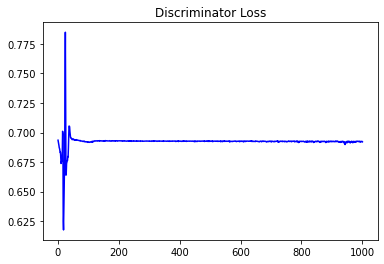

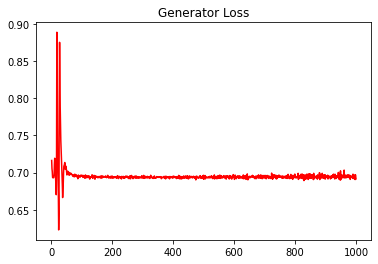

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.08461670897414755


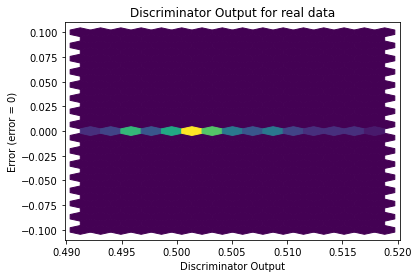

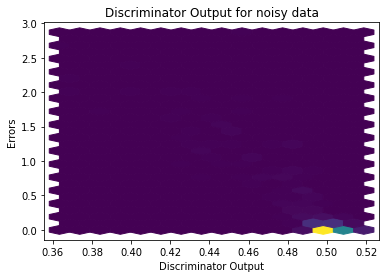

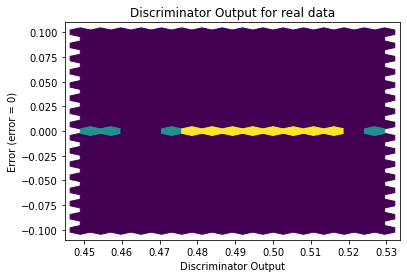

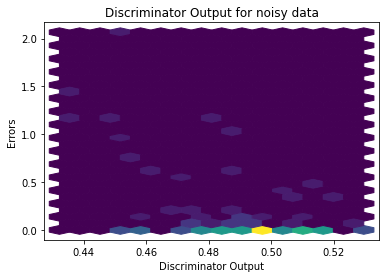

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


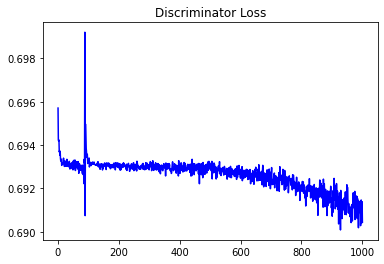

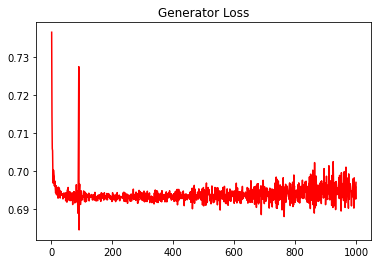

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.148487466482908


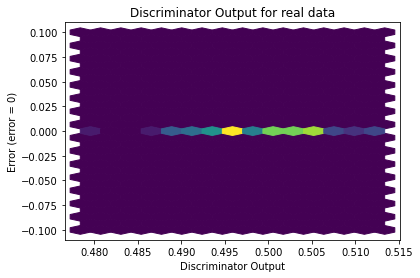

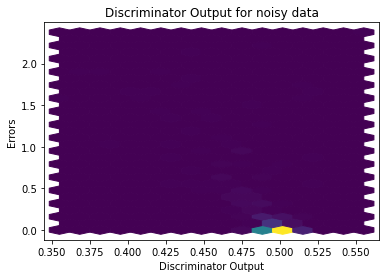

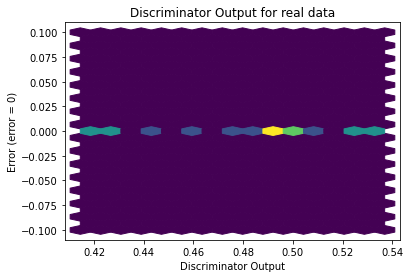

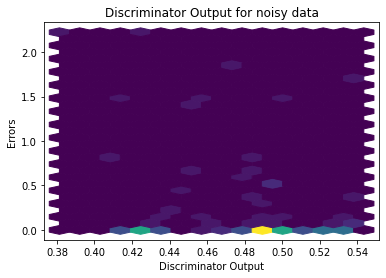

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0779]], requires_grad=True)
